In [3]:
from sklearn.svm import LinearSVC,SVC
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GroupKFold


In [13]:
df_fa = pd.read_csv('/home/syb/Code/coupling/python/jupyter/file/sc_mode_1.csv')
df_label = pd.read_csv('/home/syb/Code/coupling/python/jupyter/file/sc_mode_label.csv')
df_info = pd.read_csv('/home/syb/Code/coupling/python/jupyter/file/sc_mode_info.csv')
df= pd.concat([df_fa,df_info],join="outer",axis=1)

df = df[df['label'] !=2]

In [25]:
#利用sklearn.metrics计算各个评价指标

def cal_metrics(y,y_pred,y_score):
    auc_score = metrics.roc_auc_score(y, y_score)
    acc_score = metrics.accuracy_score(y,y_pred)
    pre_score = metrics.precision_score(y, y_pred)
    recall_score = metrics.recall_score(y, y_pred)
    f1_score = metrics.f1_score(y, y_pred)
    re = [auc_score,acc_score,pre_score,recall_score,f1_score]
    
    return re
#声明
df_metrics = pd.DataFrame(columns = ['auc','acc','pre','recall','f1'])
df_metrics_lr = pd.DataFrame(columns = ['auc','acc','pre','recall','f1'])
df_metrics_svm = pd.DataFrame(columns = ['auc','acc','pre','recall','f1'])
df_metrics_rf = pd.DataFrame(columns = ['auc','acc','pre','recall','f1'])


In [30]:
df = df.sample(frac=1).reset_index(drop=True)

np_centers = df['center'].values
np_labels = df['label'].values
np_labels[np_labels == 3] = 0
np_fa = df.drop(axis=1, columns= ['center', 'mmse', 'label']).values


0.9761904761904762
0.8369391025641026
0.9988913525498891
0.9297328687572589
0.9988738738738739
0.987012987012987
0.9503968253968254


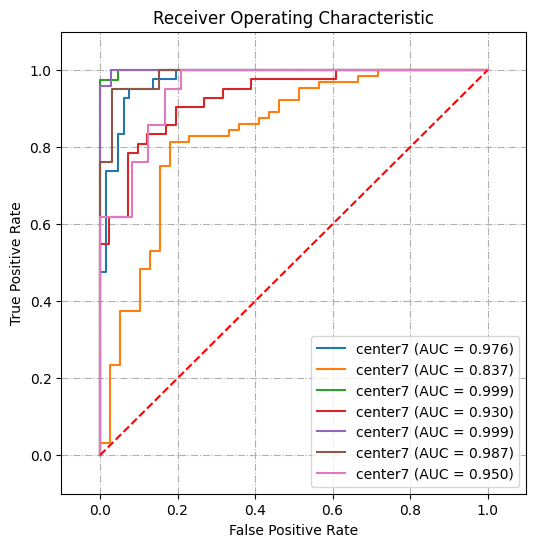

In [31]:
fig, ax = plt.subplots(figsize=(6, 6))
group_kfold = GroupKFold(n_splits=7)
group_kfold.get_n_splits(np_fa, np_labels, np_centers)
for train_index, test_index in group_kfold.split(np_fa, np_labels, np_centers):
    
    x_train = np_fa[train_index]
    y_train = np_labels[train_index]
    x_test = np_fa[test_index]
    y_test = np_labels[test_index]
    center = np_centers[test_index[0]]

    model = LogisticRegression(penalty="l2", C=0.5, solver="liblinear")
    model.fit(x_train,y_train)
    y_de = model.decision_function(x_test)
    y_score = model.predict_proba(x_test)
    y_score_1 = y_score[:,1]
    y_pred = model.predict(x_test)
    df_metrics_lr.loc[center]= cal_metrics(y_test,y_pred,y_score_1)
    fpr, tpr, thresholds = roc_curve(y_test,y_score_1)
    roc_auc = auc(fpr, tpr)
    #plt.plot(fpr, tpr, '#9400D3',label=u'AUC = %0.3f'% roc_auc)
    plt.plot( fpr, tpr, label='center%s (AUC = %0.3f)'% (i+1,roc_auc))
    print(roc_auc)
    

    model = SVC(tol=0.001)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_score_1 = y_pred
    df_metrics_svm.loc[center]= cal_metrics(y_test,y_pred,y_score_1)

    model = RandomForestClassifier(n_estimators=50)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_score = model.predict_proba(x_test)
    y_score_1 = y_score[:,1]
    df_metrics_rf.loc[center]= cal_metrics(y_test,y_pred,y_score_1)
   
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(linestyle='-.')  
plt.grid(True)
plt.show() 

df_metrics_rf.sort_index(inplace=True)
df_metrics_lr.sort_index(inplace=True)
df_metrics_svm.sort_index(inplace=True)

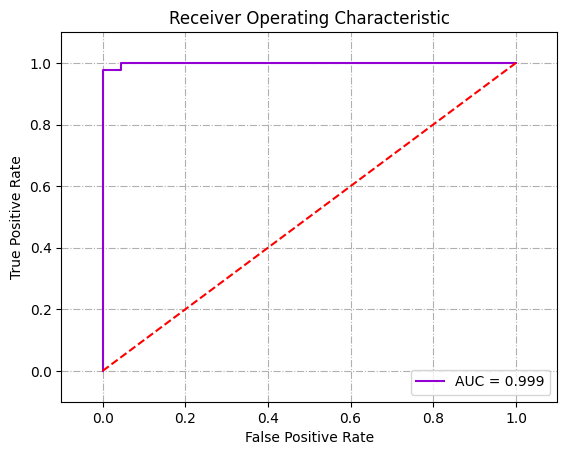

0.9988913525498891


/home/syb/anaconda3/envs/pycaret-3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


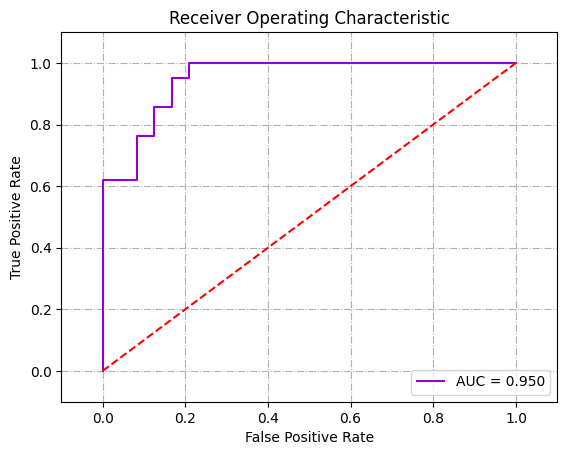

0.9503968253968254


/home/syb/anaconda3/envs/pycaret-3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


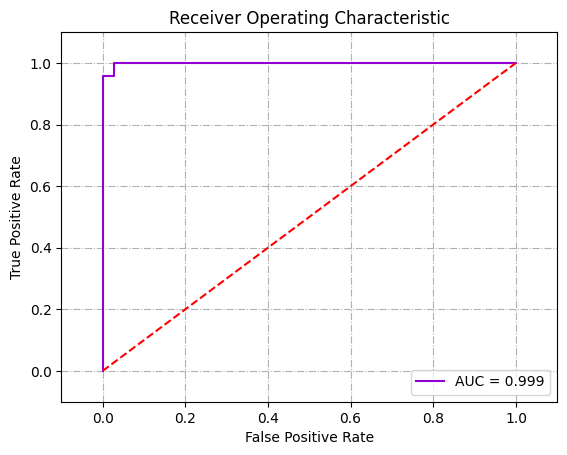

0.9988738738738739


/home/syb/anaconda3/envs/pycaret-3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


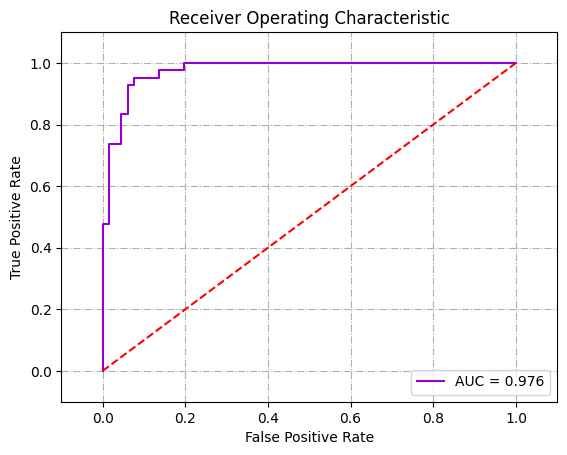

0.9761904761904762


/home/syb/anaconda3/envs/pycaret-3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


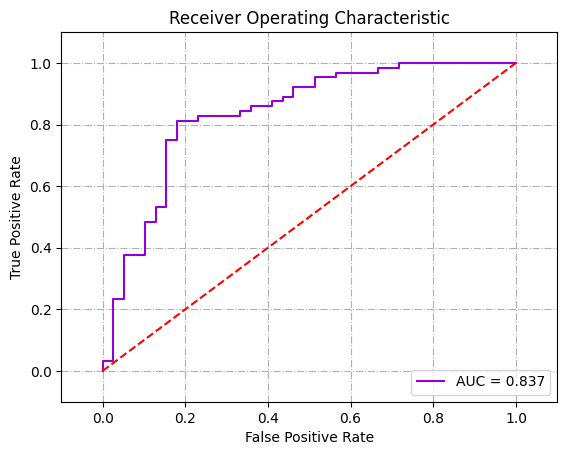

0.8369391025641026


/home/syb/anaconda3/envs/pycaret-3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


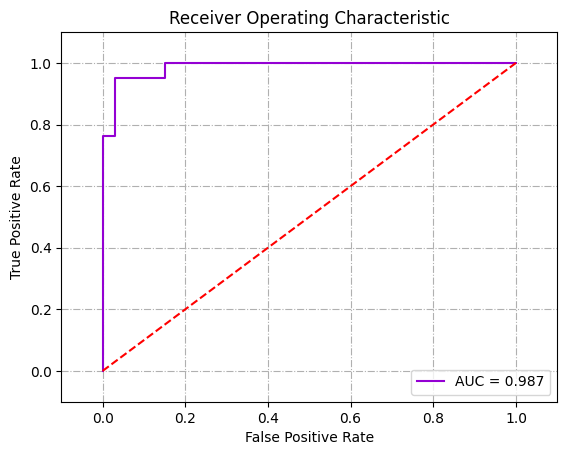

0.987012987012987


/home/syb/anaconda3/envs/pycaret-3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


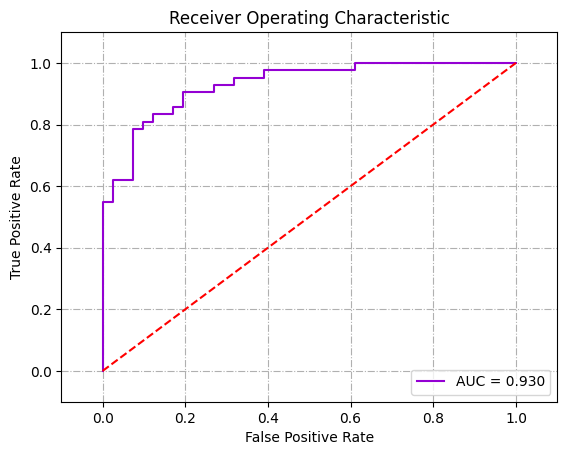

0.9297328687572589


/home/syb/anaconda3/envs/pycaret-3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [7]:
df_metrics_lr = pd.DataFrame(columns = ['auc','acc','pre','recall','f1'])
df_metrics_svm = pd.DataFrame(columns = ['auc','acc','pre','recall','f1'])
df_metrics_rf = pd.DataFrame(columns = ['auc','acc','pre','recall','f1'])

#把fa和info合并成一个表格
df_fa_1= pd.concat([df_fa,df_info],join="outer",axis=1)
for i in range(7):
    df = df_fa_1.sample(frac=1).reset_index(drop=True)
    df = df[df['label'] !=2]
    
    #df = df['label'].replace(3,0)
    df.loc[df['label']==3,'label'] = 0#
    df_test = df[df['center']== i+1].drop(axis=1,columns=['center','mmse'])
    df_train = df[df['center'] != i+1].drop(axis=1,columns=['center','mmse'])
    
    y_test = df_test['label'].values
    y_train = df_train['label'].values

    df_test= df_test.drop(axis=1,columns=['label'])
    x_test = df_test.values
    x_train = df_train.drop(axis=1,columns=['label']).values
    
    model = LogisticRegression(penalty="l2", C=0.5, solver="liblinear")
    model.fit(x_train,y_train)
    y_de = model.decision_function(x_test)
    y_score = model.predict_proba(x_test)
    y_score_1 = y_score[:,1]
    y_pred = model.predict(x_test)

    df_metrics_lr.loc[len(df_metrics_lr)]= cal_metrics(y_test,y_pred,y_score_1)

    fpr, tpr, thresholds = roc_curve(y_test,y_score_1)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, '#9400D3',label=u'AUC = %0.3f'% roc_auc)

    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.1])
    plt.ylim([-0.1,1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.grid(linestyle='-.')  
    plt.grid(True)
    plt.show()
    print(roc_auc)


    model = LinearSVC(tol=0.001)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    y_score_1 = y_pred
    df_metrics_svm.loc[len(df_metrics_svm)]= cal_metrics(y_test,y_pred,y_score_1)

    model = RandomForestClassifier(n_estimators=50)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_score = model.predict_proba(x_test)
    y_score_1 = y_score[:,1]
    df_metrics_rf.loc[len(df_metrics_rf)]= cal_metrics(y_test,y_pred,y_score_1)
   